<a href="https://colab.research.google.com/github/anjalisarathe/Machine-Learning/blob/main/Lab_7_%5BClassification_using_ANN%5D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Joint Online Faculty Development programme on Deep Learning (Parallel Architecture) Aug 23 – Sep 3 , 2021

# Tutorial 4: Covid 19 Prediction using Artificial Neural Networks

Dataset: [Covid 19 Chest X-ray dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)


A team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh along with their collaborators from Pakistan and Malaysia in collaboration with medical doctors have created a database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images. This COVID-19, normal, and other lung infection dataset is released in stages. In the first release, we have released 219 COVID-19, 1341 normal, and 1345 viral pneumonia chest X-ray (CXR) images. In the first update, we have increased the COVID-19 class to 1200 CXR images. In the 2nd update, we have increased the database to 3616 COVID-19 positive cases along with 10,192 Normal, 6012 Lung Opacity (Non-COVID lung infection), and 1345 Viral Pneumonia images. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients.



**1. Mount the Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Move to the place where data resides**

In [4]:
!cd /content/drive/MyDrive/CSIT1/

In [5]:
!pwd


/content


In [6]:
!ls

drive  sample_data


**3. Unziping the dataset**

In [7]:
!pip install unzip

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1283 sha256=e57827cd2287ce203677b86be43ccf2d9a1fb9efd99413c72c179b63a91c28f9
  Stored in directory: /root/.cache/pip/wheels/80/dc/7a/f8af45bc239e7933509183f038ea8d46f3610aab82b35369f4
Successfully built unzip


In [8]:
!unzip  /content/drive/MyDrive/CSIT1/covid_dataset.zip

Archive:  /content/drive/MyDrive/CSIT1/covid_dataset.zip
   creating: covid_dataset/
   creating: covid_dataset/COVID/
  inflating: covid_dataset/COVID/COVID-1.png  
  inflating: covid_dataset/COVID/COVID-10.png  
  inflating: covid_dataset/COVID/COVID-11.png  
  inflating: covid_dataset/COVID/COVID-12.png  
  inflating: covid_dataset/COVID/COVID-13.png  
  inflating: covid_dataset/COVID/COVID-14.png  
  inflating: covid_dataset/COVID/COVID-15.png  
  inflating: covid_dataset/COVID/COVID-16.png  
  inflating: covid_dataset/COVID/COVID-17.png  
  inflating: covid_dataset/COVID/COVID-18.png  
  inflating: covid_dataset/COVID/COVID-19.png  
  inflating: covid_dataset/COVID/COVID-2.png  
  inflating: covid_dataset/COVID/COVID-20.png  
  inflating: covid_dataset/COVID/COVID-21.png  
  inflating: covid_dataset/COVID/COVID-22.png  
  inflating: covid_dataset/COVID/COVID-23.png  
  inflating: covid_dataset/COVID/COVID-24.png  
  inflating: covid_dataset/COVID/COVID-25.png  
  inflating: covid_

**4. Install split folder python package**

https://pypi.org/project/split-folders/

In [9]:
!pip install split_folders

**5. Splitting the data in training, testing and validation set**

In [10]:
import splitfolders
splitfolders.ratio("covid_dataset", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 150 files [00:00, 2682.07 files/s]


In [11]:
import splitfolders
splitfolders.ratio("covid_dataset", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 150 files [00:00, 3986.53 files/s]


**6. Loading the dataset with normalization in batches**

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
        'split/train/',
        target_size=(128, 128),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'split/val/',
        target_size=(128, 128),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'split/test/',
        target_size=(128, 128),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 120 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


**7. Model Building**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(128, 128,3))
x = layers.Flatten()(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense_7 (Dense)             (None, 64)                3145792   
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 3)                 195       
                                                                 
Total params: 3150179 (12.02 MB)
Trainable params: 3150179 

**8. Model Compilation and Training**

In [31]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(adam, loss='categorical_crossentropy', metrics=['acc'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/100
15/15 [==============================] - 2s 35ms/step - loss: 1.0278 - acc: 0.4500 - val_loss: 0.9665 - val_acc: 0.6000
Epoch 2/100
15/15 [==============================] - 0s 24ms/step - loss: 0.7993 - acc: 0.6500 - val_loss: 0.6366 - val_acc: 0.8000
Epoch 3/100
15/15 [==============================] - 0s 25ms/step - loss: 0.6273 - acc: 0.7583 - val_loss: 0.5924 - val_acc: 0.7333
Epoch 4/100
15/15 [==============================] - 0s 27ms/step - loss: 0.5950 - acc: 0.7000 - val_loss: 0.5603 - val_acc: 0.7333
Epoch 5/100
15/15 [==============================] - 0s 28ms/step - loss: 0.5444 - acc: 0.7167 - val_loss: 0.4742 - val_acc: 0.8000
Epoch 6/100
15/15 [==============================] - 0s 25ms/step - loss: 0.5363 - acc: 0.7750 - val_loss: 0.6116 - val_acc: 0.6000
Epoch 7/100
15/15 [==============================] - 0s 25ms/step - loss: 0.5645 - acc: 0.7417 - val_loss: 0.5811 - val_acc: 0.6667
Epoch 8/100
15/15 [==============================] - 0s 24ms/step - loss: 0.

**9. Model saving**

In [24]:
model.save('covid_classification.h5')

**10. Model loading**

In [25]:
from tensorflow.keras import models
model = models.load_model('covid_classification.h5')

**11. Model weights saving**

In [26]:
model.save_weights('covid_classification_weights.h5')

**12. Model weights loading**

In [27]:
model.load_weights('covid_classification_weights.h5')

**13. Plotting accuracy and loss graph for training and validation dataset**

In [28]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

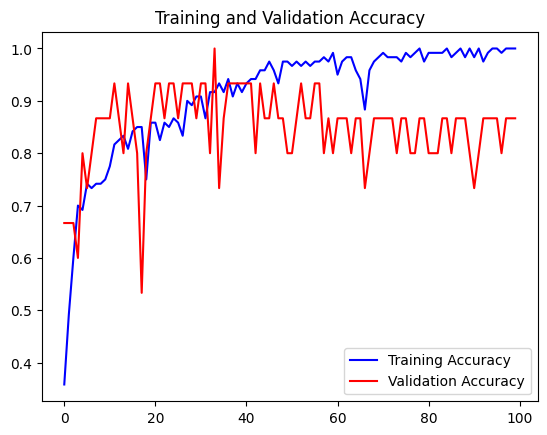

<Figure size 640x480 with 0 Axes>

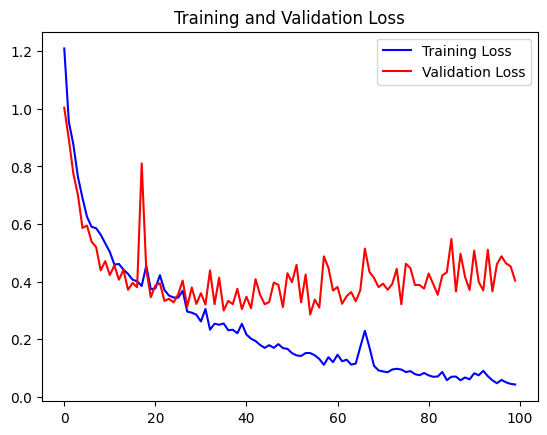

In [29]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**14. Evaluate model performance on test dataset**

In [21]:
test_output= model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
print(test_output)
print(model.metrics_names)

1/1 [==============================] - 0s 25ms/step - loss: 0.9225 - acc: 0.8000
[0.922494649887085, 0.800000011920929]
['loss', 'acc']


References:

1. https://pypi.org/project/split-folders/
2. https://keras.io/